# Employee and Bus Stops

## Context

A company XYZ intends to provide a bus shuttle service that would help its employees commute to the office. The company is based in Mountain View and the shuttle would provide transportation for employees based in San Francisco.

The city of San Francisco has given the company a list of potential bus stops that it may use. However, the company may use no more than 10 of these bus stops for its shuttle service.

The company XYZ is asking you to come up with the **10 most efficient bus stops** that would best serve its employees. Generally speaking, these "efficient" stops would result in the least walking distances between the employees' homes and their respective bus stops. To that end, you were given the following data:
- the list of bus stops provided by the city of San Francisco, `Bus_Stops.csv`
- a list of its employees' home addresses, `Employee_Addresses.csv`

Since trying out all possible combinations of 10 bus stops would take a prohibitively long time, the boss of XYZ has told you that you may simplify the problem and come up with 10 reasonable bus stops that are probably efficient.

## Objectives

- Explore and analyze the data. Provide comments on the outputs of your code and document your code well. 
- Feel free to show off your map visualization skills.
- Write an algorithm that produces the 10 best stops in your opinion. Also, please explain the rationale behind the algorithm. 
- Please the calculate the average walking distance per employee to their respective stops and report it at the end of your work.





In [ ]:
!pip install keplergl
!pip install geopandas
from keplergl import KeplerGl
import geopandas as gpd
from google.colab import output
output.disable_custom_widget_manager()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.7 MB 4.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.1 MB 66.7 MB/s 
     |████████████████████████████████| 16.6 MB 40 kB/s 
     |████████████████████████████████| 7.8 MB 1.7 MB/s 
  Using cached jedi-0.18.2-py2.py3-none-any.whl (1.6 MB)
  Created wheel for keplergl: filename=keplergl-0.3.2-py2.py3-none-any.whl size=17922343 sha256=6df90166c7dee7ea225329cc83df92849f65dbce66831094dfe79c5eb5e4873e
  Stored in directory: /root/.cache/pip/wheels/54/ae/15/d61c54bd63becaa070c9590060ae071f60673f8a0e0badac3c
Successfully built keplergl
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load Data and Preprocess Data:
- Load two files `Bus_Stops.csv` and `Employee_Addresses.csv`.
- Clean `Street_two` to get geocode.
- Concat two street columns in `Bus_Stops.csv` to make full address.

In [ ]:
import pandas as pd

bus_Stops= pd.read_csv('/content/drive/MyDrive/Interviews/DS_challenge/Bus_Stops.csv')
employee_Addresses= pd.read_csv('/content/drive/MyDrive/Interviews/DS_challenge/Employee_Addresses.csv')

In [ ]:
### User-defined-Function #####
def removing_zero(row):
  # clean Street that with start by 0
  # 02ND ST ===> 2ND ST
  if row['Street_Two'][0] == '0':
    return row['Street_Two'][1:]
  return row['Street_Two']

def create_full_address(row):
  # concat two Street
  return row['Street_One'] + ' & ' +  row['Street_Two'] + ' SAN FRANCISCO, CA'

In [ ]:
bus_Stops.head()

,Street_One,Street_Two
0,MISSION ST,ITALY AVE
1,MISSION ST,NEW MONTGOMERY ST
2,MISSION ST,01ST ST
3,MISSION ST,20TH ST
4,MISSION ST,FREMONT ST


In [ ]:
bus_Stops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Street_One  119 non-null    object
 1   Street_Two  119 non-null    object
dtypes: object(2)
memory usage: 2.0+ KB


In [ ]:
bus_Stops[['Street_One','Street_Two']].describe()

,Street_One,Street_Two
count,119,119
unique,1,119
top,MISSION ST,ITALY AVE
freq,119,1


In [ ]:
bus_Stops['Street_Two']=bus_Stops.apply(removing_zero,axis=1)
bus_Stops['full_address']  = bus_Stops.apply(create_full_address,axis=1)


In [ ]:
bus_Stops.head()

,Street_One,Street_Two,full_address
0,MISSION ST,ITALY AVE,"MISSION ST & ITALY AVE SAN FRANCISCO, CA"
1,MISSION ST,NEW MONTGOMERY ST,"MISSION ST & NEW MONTGOMERY ST SAN FRANCISCO, CA"
2,MISSION ST,1ST ST,"MISSION ST & 1ST ST SAN FRANCISCO, CA"
3,MISSION ST,20TH ST,"MISSION ST & 20TH ST SAN FRANCISCO, CA"
4,MISSION ST,FREMONT ST,"MISSION ST & FREMONT ST SAN FRANCISCO, CA"


## Test geocoder

In [ ]:
! pip install geocoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 98 kB 4.2 MB/s 


In [ ]:
import geocoder
g = geocoder.osm('NEW MONTGOMERY ST SAN FRANCISCO, CA')
g.json

{'accuracy': 0.8618449554900856,
 'address': 'New Montgomery Street, Transbay, San Francisco, CAL Fire Northern Region, California, 94107, United States',
 'bbox': {'northeast': [37.7888178, -122.401043],
  'southwest': [37.78789, -122.4019915]},
 'city': 'San Francisco',
 'confidence': 10,
 'country': 'United States',
 'country_code': 'us',
 'importance': 0.8618449554900856,
 'lat': 37.7882801,
 'lng': -122.4015241,
 'neighborhood': 'Transbay',
 'ok': True,
 'osm_id': 8918656,
 'osm_type': 'way',
 'place_id': 102771125,
 'place_rank': 26,
 'postal': '94107',
 'quality': 'secondary',
 'raw': {'place_id': 102771125,
  'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
  'osm_type': 'way',
  'osm_id': 8918656,
  'boundingbox': ['37.78789', '37.7888178', '-122.4019915', '-122.401043'],
  'lat': '37.7882801',
  'lon': '-122.4015241',
  'display_name': 'New Montgomery Street, Transbay, San Francisco, CAL Fire Northern Region, California, 94107, United State

## Get Geocode bus stops addresses

In [ ]:
# # ANGELOS ALY ===> ANGELO'S ITALY
#       if geocode_result.json == None:
#          bus_Stops['full_address'][x]= 'ANGELO\'S ITALY'
#          geocode_result = geocoder.osm(bus_Stops['full_address'][x])

In [ ]:
bus_Stops['lng'] = 0.0
bus_Stops['lat'] = 0.0

for x in range(len(bus_Stops)):
    geocode_result = geocoder.osm(bus_Stops['full_address'][x])
    if geocode_result.json == None:
      # get geocode using Street_Two
      geocode_result = geocoder.osm(bus_Stops['Street_Two'][x])
      if geocode_result.json == None:
        continue
    bus_Stops['lat'][x] = geocode_result.json['lat']
    bus_Stops['lng'][x] = geocode_result.json['lng']

<ipython-input-26-a6c82d520118>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_Stops['lat'][x] = geocode_result.json['lat']
<ipython-input-26-a6c82d520118>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_Stops['lng'][x] = geocode_result.json['lng']


In [ ]:
# check geocde
bus_Stops[bus_Stops['lat']==0.0]

,Street_One,Street_Two,full_address,lng,lat
110,MISSION ST,ANGELOS ALY,"MISSION ST & ANGELOS ALY SAN FRANCISCO, CA",0.0,0.0


In [ ]:
# correct address of 110
# ANGELOS ALY ===> ANGELO'S ITALY
bus_Stops['full_address'][110]= 'ANGELO\'S ITALY'
geocode_result = geocoder.osm(bus_Stops['full_address'][110])
bus_Stops['lat'][110] = geocode_result.json['lat']
bus_Stops['lng'][110] = geocode_result.json['lng']

<ipython-input-28-58cacd8f6d39>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_Stops['full_address'][110]= 'ANGELO\'S ITALY'
<ipython-input-28-58cacd8f6d39>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_Stops['lat'][110] = geocode_result.json['lat']
<ipython-input-28-58cacd8f6d39>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bus_Stops['lng'][110] = geocode_result.json['lng']


In [ ]:
# check geocde
bus_Stops[bus_Stops['lat']==0.0]

,Street_One,Street_Two,full_address,lng,lat


In [ ]:
# store gecode 
bus_Stops.to_csv('/content/drive/MyDrive/Interviews/DS_challenge/bus_Stops_locations.csv',index=False)

## Get Geocode employees addresses

In [ ]:
employee_Addresses.head()

,address,employee_id
0,"98 Edinburgh St, San Francisco, CA 94112, USA",206
1,"237 Accacia St, Daly City, CA 94014, USA",2081
2,"1835 Folsom St, San Francisco, CA 94103, USA",178
3,"170 Cambridge St, San Francisco, CA 94134, USA",50
4,"16 Roanoke St, San Francisco, CA 94131, USA",1863


In [ ]:
employee_Addresses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   address      2191 non-null   object
 1   employee_id  2191 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.4+ KB


In [ ]:
employee_Addresses.head()

,address,employee_id
0,"98 Edinburgh St, San Francisco, CA 94112, USA",206
1,"237 Accacia St, Daly City, CA 94014, USA",2081
2,"1835 Folsom St, San Francisco, CA 94103, USA",178
3,"170 Cambridge St, San Francisco, CA 94134, USA",50
4,"16 Roanoke St, San Francisco, CA 94131, USA",1863


In [ ]:
employee_Addresses['lng'] = 0.0
employee_Addresses['lat'] = 0.0

for x in range(len(employee_Addresses)):
    geocode_result = geocoder.osm(employee_Addresses['address'][x])
    if geocode_result.json == None:
      continue
    employee_Addresses['lat'][x] = geocode_result.json['lat']
    employee_Addresses['lng'][x] = geocode_result.json['lng']

<ipython-input-86-7b873cd0b5e3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employee_Addresses['lat'][x] = geocode_result.json['lat']
<ipython-input-86-7b873cd0b5e3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employee_Addresses['lng'][x] = geocode_result.json['lng']
ERROR:geocoder.base:Status code Unknown from https://nominatim.openstreetmap.org/search: ERROR - HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=5.0)
ERROR:geocoder.base:Status code Unknown from https://nominatim.openstreetmap.org/search: ERROR - HTTPSConnectionPool(host='nominatim.openstreetmap.or

In [ ]:
# check geocde
pd.set_option('display.max_colwidth', None)# non-truncate address
employee_Addresses[employee_Addresses['lat']==0.0]

,address,employee_id,lng,lat
240,"St. Luke's Hospital Garage, San Francisco, CA 94110, USA",941,0.0,0.0
313,"St. Luke's Hospital Garage, San Francisco, CA 94110, USA",1320,0.0,0.0
474,"San Francisco War Memorial and Performing Arts Center, 301 Van Ness Ave, San Francisco, CA 94102, USA",1814,0.0,0.0
480,"141 Treat St, San Francisco, CA 94103, USA",647,0.0,0.0
774,"141 Treat St, San Francisco, CA 94103, USA",1475,0.0,0.0
942,"18 Day St, San Francisco, CA 94110, USA",424,0.0,0.0
994,"40 Cambridge St, San Francisco, CA 94134, USA",2119,0.0,0.0
1182,"100 Van Ness Avenue, 100 Van Ness Ave, San Francisco, CA 94102, USA",18,0.0,0.0
1346,"St Mary's Park Footbridge, San Francisco, CA, USA",1195,0.0,0.0
1582,"20 Marsilly St, San Francisco, CA 94112, USA",916,0.0,0.0


In [ ]:
temp=employee_Addresses[employee_Addresses['lat']==0.0]

In [ ]:
for idx,row in temp.iterrows():
  # Remove the name of the building and keep the raw address only
  geocode_result = geocoder.osm(employee_Addresses['address'][idx][employee_Addresses['address'][idx].find(',')+1:])
  if geocode_result.json == None:
      continue
  employee_Addresses['lat'][idx] = geocode_result.json['lat']
  employee_Addresses['lng'][idx] = geocode_result.json['lng']

<ipython-input-109-400b04a556dc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employee_Addresses['lat'][idx] = geocode_result.json['lat']
<ipython-input-109-400b04a556dc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employee_Addresses['lng'][idx] = geocode_result.json['lng']


In [ ]:
employee_Addresses[employee_Addresses['lat']==0.0]

,address,employee_id,lng,lat


In [ ]:
# store geocode
employee_Addresses.to_csv('/content/drive/MyDrive/Interviews/DS_challenge/employee_locations.csv',index=False)

## Explore Data 

###### Insights From visualization:


1.   There are outliers in bus stops that have s have longitude greater than -50
2.   Employees addresses look like as touching Groups. 



In [ ]:
import pandas as pd

bus_Stops= pd.read_csv('/content/drive/MyDrive/Interviews/DS_challenge/bus_Stops_locations.csv')
employee_Addresses= pd.read_csv('/content/drive/MyDrive/Interviews/DS_challenge/employee_locations.csv')

###### visualize bus stops using different ways.

Text(0.5, 1.0, 'Bus Stops')

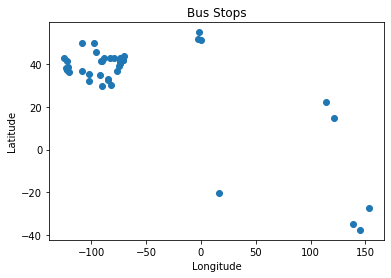

In [ ]:
# scatter plot Bus Stops
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(bus_Stops['lng'], bus_Stops['lat'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Bus Stops')

##### Note: there are outlier bus stops have longitude greater than -50, It may be better we drop it

In [ ]:
# map visualization using plotly
import plotly.express as px
import plotly.graph_objects as go
fig = go.Figure(px.scatter_mapbox(bus_Stops, lat="lat", lon="lng",  hover_data=["full_address"],
                      zoom=1,height=600,title = 'Bus stops'))
fig.update_geos(fitbounds="geojson")
# fig.update_mapboxes(domain_x=[0,1],domain_y=[0,1])
# fig.update_mapboxes(bounds=dict(east=170,north=70,south=-38,west=-150))
fig.update_geos(lataxis_range=[-38,70])
fig.update_geos(lonaxis_range=[-150, 170])
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(title = 'Bus stops')


# fig.show()
# fig = go.Figure(px.scatter_geo(bus_Stops, lat="lat", lon="lng", hover_data=["full_address"]))
# fig.update_layout(
#         title = 'Bus stops',
#         geo_scope='world',
#     )
# # fig.update_geos(
# #     lataxis_range=[-38,70], lonaxis_range=[-150, 170]
# # )
fig.show()

In [ ]:
# for more clear and interactive map visualization, use KeplerGl
from google.colab import output
output.enable_custom_widget_manager()

In [ ]:
#Create a basemap 
map_1 = KeplerGl(height=600, width=400,)#show the map# Create a gepdataframe
gdf = gpd.GeoDataFrame(bus_Stops, geometry=gpd.points_from_xy(bus_Stops['lng'],bus_Stops['lat']))# Add data to Kepler
map_1.add_data(data=gdf, name='bus Stop map') # adding geo enabled dataframe to map
map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'bus Stop map': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19…

In [ ]:
bus_Stops= bus_Stops.drop('geometry',axis=1)

###### visualize Employee Addresses using different ways.

Text(0.5, 1.0, 'Employee Locations')

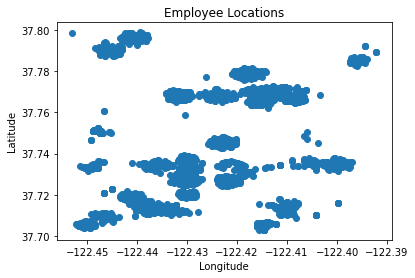

In [ ]:
# scatter plot Employee Addresses
plt.figure()
plt.scatter(employee_Addresses['lng'], employee_Addresses['lat'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Employee Locations')


In [ ]:
# map visualization using plotly

# fig = go.Figure(px.scatter_geo(employee_Addresses, lat="lat", lon="lng", hover_data=['address'],height=600,width=500))
# fig.update_layout(
#         title = 'Employee locations',
#         geo_scope='usa',
#     )
# # fig.update_geos(
# #     lataxis_range=[37.5,38], lonaxis_range=[-122.48, -122.42]
# # )
# fig.show()
fig = go.Figure(px.scatter_mapbox(employee_Addresses, lat="lat", lon="lng", hover_data=['address'],
                        zoom=11,height=600))
#fig.update_geos(fitbounds="geojson")
fig.update_geos(lataxis_range=[-38,70])
fig.update_geos(lonaxis_range=[-150, 170])
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

###### Note: There are touching Groups of employees addresses 

In [ ]:
#Create a basemap 
map = KeplerGl(height=1000, width=500)#show the map# Create a gepdataframe
gdf = gpd.GeoDataFrame(employee_Addresses, geometry=gpd.points_from_xy(employee_Addresses['lng'],employee_Addresses['lat']))# Add data to Kepler
map.add_data(data=gdf, name='Employee Addresses map') # adding geo enabled dataframe to map
map

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'Employee Addresses map': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, …

In [ ]:
employee_Addresses= employee_Addresses.drop('geometry',axis=1)

## Distance metrix: 
we need to distance between each employee and each bus stop for baseline model and evaluation the optimal algorithm.

##### Note: Distance metrix have large time execution So:
- Drop outlier in bus stops.
- Store Distance metrix

In [ ]:
# drop outlier in bus stops
bus_Stops = bus_Stops[bus_Stops['lng']< -50]

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances  # L2 distance
from sklearn.metrics.pairwise import manhattan_distances  # L1 distance
from geopy import distance   # compute geographical distance by km

dict_bus={bus : [0]*len(employee_Addresses) for bus in bus_Stops['full_address'] }
distance_metrix = pd.DataFrame(dict_bus, index= employee_Addresses['employee_id'])
distance_metrix1 = pd.DataFrame(dict_bus, index= employee_Addresses['employee_id'])
geodistance_metrix = pd.DataFrame(dict_bus, index= employee_Addresses['employee_id'])

# employee location data
employee_location =employee_Addresses.set_index('employee_id')[['lng','lat']]
# bus stops array
stops = np.array(bus_Stops.loc[:, ['lng', 'lat']])
# compute l2&l1 distance
for idx,row in employee_location.iterrows():
  distances_l2 = [float(euclidean_distances(np.array(employee_location.loc[idx]).reshape(1, -1), stop.reshape(1, -1))) for stop in stops]
  distance_metrix.loc[idx,:] = distances_l2
  
  distances_l1 = [float(manhattan_distances(np.array(employee_location.loc[idx]).reshape(1, -1), stop.reshape(1, -1))) for stop in stops]
  distance_metrix1.loc[idx,:] = distances_l1

# employee geolocation data
employee_location_geo =employee_Addresses.set_index('employee_id')[['lat','lng']]
# bus stops array
stops_geo= np.array(bus_Stops.loc[:, ['lat', 'lng']])

for idx,row in employee_location_geo.iterrows():
  point = tuple(employee_location_geo.loc[idx])
  l=[tuple(stop) for stop in stops_geo]
  geodistances = [distance.great_circle(point,p).km for p in l]
  geodistance_metrix.loc[idx,:] = geodistances

In [ ]:
#store distance metrix
distance_metrix.to_csv('/content/drive/MyDrive/Interviews/DS_challenge/distance_metrix.csv')
distance_metrix1.to_csv('/content/drive/MyDrive/Interviews/DS_challenge/distance_metrix1.csv')
geodistance_metrix.to_csv('/content/drive/MyDrive/Interviews/DS_challenge/distance_metrix_geo.csv')

In [ ]:
distance_metrix = pd.read_csv('/content/drive/MyDrive/Interviews/DS_challenge/distance_metrix',index_col='employee_id')
distance_metrix1= pd.read_csv('/content/drive/MyDrive/Interviews/DS_challenge/distance_metrix1',index_col='employee_id')
geodistance_metrix= pd.read_csv('/content/drive/MyDrive/Interviews/DS_challenge/distance_metrix_geo',index_col='employee_id')

##### Explore Employee Distances


1.   There are Big differece over the 15 last bus stops(we can consider outliers)




In [ ]:
#line plot for aggregation

from plotly.subplots import make_subplots
import plotly.graph_objects as go

#fig = make_subplots(rows=3, cols=1)

fig = px.line(distance_metrix.describe().T.sort_values(by='mean')['mean'])
fig.update_layout(height=600, width=600, title_text="the average walking distance per employee in L2 distance")
fig.show()

fig = px.line(distance_metrix1.describe().T.sort_values(by='mean')['mean'])
fig.update_layout(height=600, width=600, title_text="the average walking distance per employee in L1 distance")
fig.show()

fig = px.line(geodistance_metrix.describe().T.sort_values(by='mean')['mean'])
fig.update_layout(height=600, width=600, title_text="the average walking distance per employee in  geodistance")
fig.show()


## Baseline algorithm :
baseline model is the 10 bus stops have the least the average walking distance per employee

In [ ]:
# baseline model 
def baseline(distance_metrix):
  baseline = distance_metrix.describe().T.sort_values(by='mean').head(10)
  #baseline['mean'].sum()
  best_stops= list(baseline.index)
  baseline_stops= employee_Addresses.copy()
  # get the closest stop for each employee
  baseline_stops['stop'] = distance_metrix[best_stops].T.idxmin()
  # get distance between the closest stop for each employee and its location
  baseline_stops['distance'] = distance_metrix[best_stops].min(axis=1)
  print('The Sumtion of distance of employees = ',baseline_stops['distance'].sum())
  # create data include all information about buses and employees
  total_info_baseline = pd.merge(bus_Stops[['full_address','lng','lat']],baseline_stops,left_on= 'full_address',right_on='stop')
  total_info_baseline = total_info_baseline.drop('full_address',axis=1)
  total_info_baseline = total_info_baseline.rename(columns={"lng_x": "lng_bus", "lat_x": "lat_bus","lng_y": "lng", "lat_y": "lat"})
  return total_info_baseline

In [ ]:
# Apply baseline model for different distances 
baseline_l2= baseline(distance_metrix)
baseline_l1= baseline(distance_metrix1)
baseline_geo= baseline(geodistance_metrix)

The Sumtion of distance of employees =  48.80343834112453
The Sumtion of distance of employees =  61.5752645858428
The Sumtion of distance of employees =  5102.662816871953


In [ ]:
# the 10 best stops in baseline
print('the 10 best stops in L2 baseline ',list(baseline_l2['stop'].unique())[1:])
print('the 10 best stops in L1 baseline ',list(baseline_l1['stop'].unique())[1:])
print('the 10 best stops in geo baseline ',list(baseline_geo['stop'].unique())[1:])

the 10 best stops in L2 baseline  ['MISSION ST & BOSWORTH ST SAN FRANCISCO, CA', 'MISSION ST & POWERS AVE SAN FRANCISCO, CA', 'MISSION ST & VALENCIA ST SAN FRANCISCO, CA', 'MISSION ST & APPLETON AVE SAN FRANCISCO, CA', 'MISSION ST & BROOK ST SAN FRANCISCO, CA', 'MISSION ST & HIGHLAND AVE SAN FRANCISCO, CA', 'MISSION ST & GODEUS ST SAN FRANCISCO, CA', 'MISSION ST & RICHLAND AVE SAN FRANCISCO, CA', 'MISSION ST & 30TH ST SAN FRANCISCO, CA']
the 10 best stops in L1 baseline  ['MISSION ST & RICHLAND AVE SAN FRANCISCO, CA', 'MISSION ST & TRUMBULL ST SAN FRANCISCO, CA', 'MISSION ST & VALENCIA ST SAN FRANCISCO, CA', 'MISSION ST & BOSWORTH ST SAN FRANCISCO, CA', 'MISSION ST & APPLETON AVE SAN FRANCISCO, CA', 'MISSION ST & HIGHLAND AVE SAN FRANCISCO, CA', 'MISSION ST & 30TH ST SAN FRANCISCO, CA']
the 10 best stops in geo baseline  ['MISSION ST & BOSWORTH ST SAN FRANCISCO, CA', 'MISSION ST & POWERS AVE SAN FRANCISCO, CA', 'MISSION ST & VALENCIA ST SAN FRANCISCO, CA', 'MISSION ST & BROOK ST SAN FR

In [ ]:
# store results to comparison
results = pd.DataFrame()
results['baseline_l2'] = baseline_l2['distance'].describe()
results['baseline_l1'] = baseline_l1['distance'].describe()
results['baseline_geodistance'] = baseline_geo['distance'].describe()
results

,baseline_l2,baseline_l1,baseline_geodistance
count,2190.000000,2190.000000,2190.000000
mean,0.022285,0.028117,2.329983
std,0.013607,0.018971,1.466315
min,0.000114,0.000122,0.011530
25%,0.009843,0.011605,0.969902
50%,0.022364,0.027483,2.354038
75%,0.028838,0.036887,2.983304
max,0.062127,0.086174,6.513306


##### Explore results of baseline model


1.   There are only two bus stop for 83.8% from total employees.
2.   From map visualization, we can look at distribution of bus stops on employees.


In [ ]:
# display number of employees in each bus stop
count_df1 = baseline_l2['stop'].value_counts().to_frame()
count_df2 = baseline_l1['stop'].value_counts().to_frame()
count_df3 = baseline_geo['stop'].value_counts().to_frame()

# pie plot for number of employees  in each stop
fig = px.pie(count_df1, values='stop', names=count_df1.index, title='Population of Bus Stop')
fig.show()

fig = px.pie(count_df2, values='stop', names=count_df2.index, title='Population of Bus Stop')
fig.show()

fig = px.pie(count_df3, values='stop', names=count_df3.index, title='Population of Bus Stop')
fig.show()


Text(0.5, 1.0, 'Employee Locations')

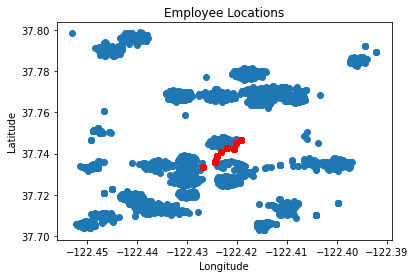

In [ ]:
# scatter plot Employee Addresses
# bus_Stops[bus_Stops['full_address'].isin(best_stops)]
plt.figure()
plt.scatter(baseline_l2['lng'], baseline_l2['lat'])
plt.scatter(baseline_l2['lng_bus'], baseline_l2['lat_bus'],c='red')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Employee Locations')

In [ ]:
baseline_l2.columns

Index(['lng_bus', 'lat_bus', 'address', 'employee_id', 'lng', 'lat', 'stop',
       'distance'],
      dtype='object')

In [ ]:
fig = go.Figure(px.scatter_mapbox(baseline_l2, lat="lat", lon="lng", hover_data=['stop', 'distance', 'lng_bus', 'lat_bus','employee_id']
                      ,zoom=11,height=600,color='stop'))
#fig.update_geos(fitbounds="geojson")
fig.update_geos(lataxis_range=[-38,70])
fig.update_geos(lonaxis_range=[-150, 170])
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

### Cluster Employee Addresses: It assigns each employee to cluster from geospatial data

In [ ]:
# apply Hierarchical Clustering using complete linkage and euclidean distance
from sklearn.cluster import AgglomerativeClustering

hier_cluster = AgglomerativeClustering(n_clusters=10,linkage='complete')
hier_cluster.fit(employee_Addresses[['lng','lat']])

AgglomerativeClustering(linkage='complete', n_clusters=10)

In [ ]:
employee_Addresses['label'] = hier_cluster.labels_
# compute centroid of each cluster
from sklearn.neighbors import NearestCentroid
clf = NearestCentroid()
clf.fit(employee_Addresses[['lng','lat']], employee_Addresses['label'])
clf.centroids_
dict_centroids={'label' : [idx  for idx in range(len(clf.centroids_))]
                ,'lng_centroids' : [c[0] for c in clf.centroids_]
                ,'lat_centroids': [c[1] for c in clf.centroids_]}
df_centroids=pd.DataFrame(dict_centroids)

In [ ]:
#Create a basemap 
# map = KeplerGl(height=900, width=400)#show the map# Create a gepdataframe
# gdf = gpd.GeoDataFrame(employee_Addresses, geometry=gpd.points_from_xy(employee_Addresses['lng'],employee_Addresses['lat']))# Add data to Kepler
# map.add_data(data=gdf, name='Employee Addresses map') # adding geo enabled dataframe to map
# map

#### Visualize clusters on map

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

map = px.scatter_mapbox(employee_Addresses, lat="lat", lon="lng",
                        color='label',
                        zoom=11,
                      height=600,
                        )
map.update_geos(fitbounds="locations")
map.update_layout(mapbox_style="open-street-map")
map.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
map.update_layout(legend = dict(bordercolor='rgb(100,100,100)',
                                borderwidth=2,
                                itemclick= 'toggleothers',# when you are clicking an item in legend all that are not in the same group are hidden
                                x=0.91,
                                y=1))
map.show()

Text(0.5, 1.0, 'Employee Locations')

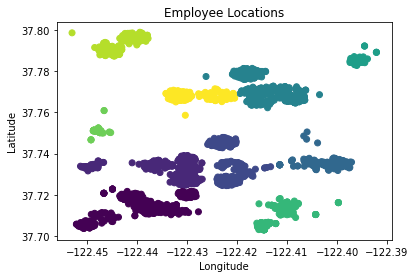

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(employee_Addresses['lng'], employee_Addresses['lat'],c=employee_Addresses['label'])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Employee Locations')


Text(0.5, 1.0, 'Employee Locations')

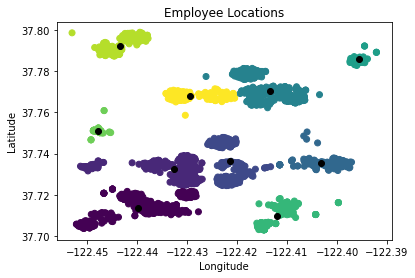

In [ ]:
# visualize centroids with clusters
plt.figure()
plt.scatter(employee_Addresses['lng'], employee_Addresses['lat'],c=employee_Addresses['label'])
plt.scatter(clf.centroids_[:,0],clf.centroids_[:,1],c='black')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Employee Locations')

### Bus Stops Selection For Hierarchical Clustering

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances  # L2 distance
from sklearn.metrics.pairwise import manhattan_distances  # L1 distance

# bus stops array
stops = np.array(bus_Stops.loc[:, ['lng', 'lat']])
stop_index_l2 = []
stop_index_l1 = []
# For each centroid, find the distances to every bus stop and the closest stop
for idx,centroid in enumerate(clf.centroids_):
    distances_l2 = [float(euclidean_distances(centroid.reshape(1, -1), stop.reshape(1, -1))) for stop in stops]
    stop_index_l2.append(np.argmin(distances_l2))

    distances_l1 = [float(manhattan_distances(centroid.reshape(1, -1), stop.reshape(1, -1))) for stop in stops]
    stop_index_l1.append(np.argmin(distances_l1))

In [ ]:
stop_index_l2

[29, 35, 68, 33, 50, 73, 71, 20, 50, 60]

In [ ]:
stop_index_l1

[36, 35, 63, 33, 5, 73, 88, 117, 50, 66]

In [ ]:
# get Names of bus stops
algo_bus_list=list(bus_Stops.loc[stop_index_l2]['full_address'])
algo_bus_dict={'label':[idx  for idx in range(10)],
               'station_name': [bus for bus in algo_bus_list]}
algo_bus_df = pd.DataFrame(algo_bus_dict)
employee_clusters_l2= pd.merge(employee_Addresses,df_centroids,on='label')
employee_clusters_l2 = pd.merge(employee_clusters_l2,algo_bus_df,on='label')

algo_bus_list=list(bus_Stops.loc[stop_index_l1]['full_address'])
algo_bus_dict={'label':[idx  for idx in range(10)],
               'station_name': [bus for bus in algo_bus_list]}
algo_bus_df = pd.DataFrame(algo_bus_dict)
employee_clusters_1= pd.merge(employee_Addresses,df_centroids,on='label')
employee_clusters_1 = pd.merge(employee_clusters_1,algo_bus_df,on='label')

#### Explore and visualize result of clustering:
- we can big difference in distribution of bus stops on employees about results of baseline.

In [ ]:
fig = go.Figure(px.scatter_mapbox(employee_clusters_l2, lat="lat", lon="lng", hover_data=['station_name', 'address','employee_id']
                      ,zoom=11,height=600,color='station_name'))
#fig.update_geos(fitbounds="geojson")
fig.update_geos(lataxis_range=[-38,70])
fig.update_geos(lonaxis_range=[-150, 170])
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

Text(0.5, 1.0, 'Employee Locations')

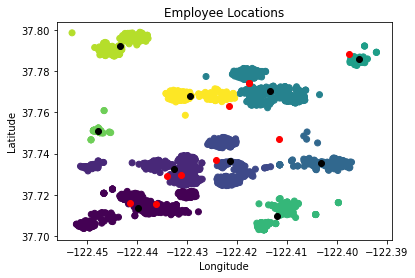

In [ ]:
plt.figure()
plt.scatter(employee_Addresses['lng'], employee_Addresses['lat'],c=employee_Addresses['label'])
plt.scatter(clf.centroids_[:,0],clf.centroids_[:,1],c='black')
plt.scatter(stops[stop_index_l2][:,0],stops[stop_index_l2][:,1],c='red')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Employee Locations')

## Apply EM Clustering

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=10)
employee_Addresses['label_EM'] = gmm.fit_predict(employee_Addresses[['lng','lat']])

In [ ]:
# compute centroid of each cluster
from sklearn.neighbors import NearestCentroid
clf2 = NearestCentroid()
clf2.fit(employee_Addresses[['lng','lat']], employee_Addresses['label_EM'])
#clf.centroids_
dict_centroids2={'label' : [idx  for idx in range(len(clf2.centroids_))]
                ,'lng_centroids' : [c[0] for c in clf2.centroids_]
                ,'lat_centroids': [c[1] for c in clf2.centroids_]}
df_centroids2=pd.DataFrame(dict_centroids2)
df_centroids2

,label,lng_centroids,lat_centroids
0,0,-122.436392,37.716571
1,1,-122.413429,37.770224
2,2,-122.422290,37.742942
3,3,-122.443518,37.792471
4,4,-122.412587,37.709427
5,5,-122.430851,37.732708
6,6,-122.449123,37.706575
7,7,-122.403220,37.735076
8,8,-122.395605,37.785769
9,9,-122.429916,37.767968


### Explore and visualize EM cluster:
we can observe that results of EM is better than Hierarchical Clustering, since it can handle touching Groups

Text(0.5, 1.0, 'Employee Locations')

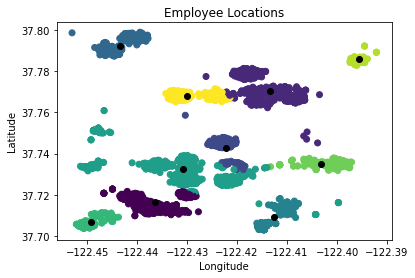

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(employee_Addresses['lng'], employee_Addresses['lat'],c=employee_Addresses['label_EM'])
plt.scatter(clf2.centroids_[:,0],clf2.centroids_[:,1],c='black')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Employee Locations')

## Bus Stops Selection For EM Clustering

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances  # L2 distance

# bus stops array
stops = np.array(bus_Stops.loc[:, ['lng', 'lat']])
stop_index_l2 = []

# For each centroid, find the distances to every bus stop and the closest stop
for idx,centroid in enumerate(clf2.centroids_):
    distances_l2 = [float(euclidean_distances(centroid.reshape(1, -1), stop.reshape(1, -1))) for stop in stops]
    stop_index_l2.append(np.argmin(distances_l2))

In [ ]:
stop_index_l2

[71, 50, 15, 50, 71, 17, 23, 33, 73, 60]

In [ ]:
# get Names of bus stops
algo_bus_list=list(bus_Stops.loc[stop_index_l2]['full_address'])
algo_bus_dict={'label':[idx  for idx in range(10)],
               'station_name': [bus for bus in algo_bus_list]}
algo_bus_df = pd.DataFrame(algo_bus_dict)
algo_bus_df

,label,station_name
0,0,"MISSION ST & AMAZON AVE SAN FRANCISCO, CA"
1,1,"MISSION ST & 11TH ST SAN FRANCISCO, CA"
2,2,"MISSION ST & 30TH ST SAN FRANCISCO, CA"
3,3,"MISSION ST & 11TH ST SAN FRANCISCO, CA"
4,4,"MISSION ST & AMAZON AVE SAN FRANCISCO, CA"
5,5,"MISSION ST & TRUMBULL ST SAN FRANCISCO, CA"
6,6,"MISSION ST & OLIVER ST SAN FRANCISCO, CA"
7,7,"MISSION ST & PRECITA AVE SAN FRANCISCO, CA"
8,8,"MISSION ST & SHAW ALY SAN FRANCISCO, CA"
9,9,"MISSION ST & CLARION ALY SAN FRANCISCO, CA"


In [ ]:
employee_clusters_EM=pd.merge(employee_Addresses,df_centroids2,left_on='label_EM',right_on='label').drop(['label_x','label_y'],axis=1)

In [ ]:
employee_clusters_EM= pd.merge(employee_clusters_EM,algo_bus_df,left_on='label_EM',right_on='label').drop('label',axis=1)

In [ ]:
employee_clusters_EM.head(1)

,address,employee_id,lng,lat,label_EM,lng_centroids,lat_centroids,station_name
0,"98 Edinburgh St, San Francisco, CA 94112, USA",206,-122.427311,37.727605,5,-122.430851,37.732708,"MISSION ST & TRUMBULL ST SAN FRANCISCO, CA"


## Evaluation

In [ ]:
# get distance between bus stops and employee
def get_distance_l2(row):
  return  distance_metrix[row['station_name']].loc[row['employee_id']]
def get_distance_l1(row):
  return  distance_metrix1[row['station_name']].loc[row['employee_id']]

In [ ]:
print('The Sumtion of distance of employees =',employee_clusters_l2.apply(get_distance_l2,axis=1).sum())
employee_clusters_l2['distance'] = employee_clusters_l2.apply(get_distance_l2,axis=1)

print('The Sumtion of distance of employees =',employee_clusters_1.apply(get_distance_l1,axis=1).sum())
employee_clusters_1['distance'] = employee_clusters_1.apply(get_distance_l1,axis=1)

The Sumtion of distance of employees = 26.84021611414215
The Sumtion of distance of employees = 34.38579904953976


In [ ]:
results['Hierarchical_l2'] = employee_clusters_l2['distance'].describe()
results['Hierarchical_l1'] = employee_clusters_1['distance'].describe()
results

,baseline_l2,baseline_l1,baseline_geodistance,Hierarchical_l2,Hierarchical_l1
count,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000
mean,0.022280,0.028108,2.329552,0.012250,0.015694
std,0.013605,0.018971,1.466118,0.008912,0.011638
min,0.000114,0.000122,0.011530,0.000462,0.000476
25%,0.009844,0.011584,0.970611,0.005663,0.007487
50%,0.022358,0.027483,2.354038,0.009598,0.011996
75%,0.028809,0.036881,2.980296,0.014612,0.019509
max,0.062127,0.086174,6.513306,0.043104,0.059969


In [ ]:
# evaluate EM
print('The Sumtion of distance of employees =',employee_clusters_EM.apply(get_distance_l2,axis=1).sum())
employee_clusters_EM['distance'] = employee_clusters_EM.apply(get_distance_l2,axis=1)

The Sumtion of distance of employees = 25.261876725321972


In [ ]:
results['EM_l2'] = employee_clusters_EM['distance'].describe()
results

,baseline_l2,baseline_l1,baseline_geodistance,Hierarchical_l2,Hierarchical_l1,EM_l2
count,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000,2191.000000
mean,0.022280,0.028108,2.329552,0.012250,0.015694,0.011530
std,0.013605,0.018971,1.466118,0.008912,0.011638,0.009336
min,0.000114,0.000122,0.011530,0.000462,0.000476,0.000221
25%,0.009844,0.011584,0.970611,0.005663,0.007487,0.004787
50%,0.022358,0.027483,2.354038,0.009598,0.011996,0.007820
75%,0.028809,0.036881,2.980296,0.014612,0.019509,0.013995
max,0.062127,0.086174,6.513306,0.043104,0.059969,0.043104


In [ ]:
employee_clusters_EM['station_name'].unique()

array(['MISSION ST & TRUMBULL ST SAN FRANCISCO, CA',
       'MISSION ST & AMAZON AVE SAN FRANCISCO, CA',
       'MISSION ST & 11TH ST SAN FRANCISCO, CA',
       'MISSION ST & OLIVER ST SAN FRANCISCO, CA',
       'MISSION ST & CLARION ALY SAN FRANCISCO, CA',
       'MISSION ST & PRECITA AVE SAN FRANCISCO, CA',
       'MISSION ST & SHAW ALY SAN FRANCISCO, CA',
       'MISSION ST & 30TH ST SAN FRANCISCO, CA'], dtype=object)

## Finally, EM is the best algorithm , since it have the least the average walking distance per employee = 0.011530 distance unit / employee.
